In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
X, y = make_moons(n_samples=600, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

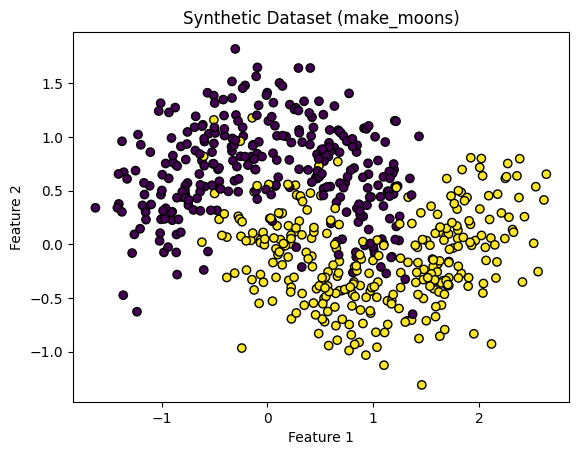

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolor='k')
plt.title('Synthetic Dataset (make_moons)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [16]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear')
svm_poly = SVC(kernel='poly')
svm_sigmoid = SVC(kernel='sigmoid')
svm_rbf = SVC(kernel='rbf')

svm_linear.fit(X_train_scaled, y_train)
svm_poly.fit(X_train_scaled, y_train)
svm_sigmoid.fit(X_train_scaled, y_train)
svm_rbf.fit(X_train_scaled, y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [13]:
y_pred_linear = svm_linear.predict(X_test_scaled)
print("Linear SVM Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_linear)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_linear))
print("Classification Report:")
print(classification_report(y_test, y_pred_linear))



Linear SVM Metrics:
Accuracy: 0.8166666666666667
Confusion Matrix:
[[53  6]
 [16 45]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        59
           1       0.88      0.74      0.80        61

    accuracy                           0.82       120
   macro avg       0.83      0.82      0.82       120
weighted avg       0.83      0.82      0.82       120



In [12]:

y_pred_poly = svm_poly.predict(X_test_scaled)
print("Polynomial SVM Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_poly)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_poly))
print("Classification Report:")
print(classification_report(y_test, y_pred_poly))


Polynomial SVM Metrics:
Accuracy: 0.8333333333333334
Confusion Matrix:
[[56  3]
 [17 44]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.95      0.85        59
           1       0.94      0.72      0.81        61

    accuracy                           0.83       120
   macro avg       0.85      0.84      0.83       120
weighted avg       0.85      0.83      0.83       120



In [14]:
y_pred_sigmoid = svm_sigmoid.predict(X_test_scaled)
print("Sigmoid SVM Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_sigmoid)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_sigmoid))
print("Classification Report:")
print(classification_report(y_test, y_pred_sigmoid))


Sigmoid SVM Metrics:
Accuracy: 0.65
Confusion Matrix:
[[42 17]
 [25 36]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.71      0.67        59
           1       0.68      0.59      0.63        61

    accuracy                           0.65       120
   macro avg       0.65      0.65      0.65       120
weighted avg       0.65      0.65      0.65       120



In [15]:

y_pred_rbf = svm_rbf.predict(X_test_scaled)
print("RBF SVM Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rbf)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rbf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rbf))


RBF SVM Metrics:
Accuracy: 0.8583333333333333
Confusion Matrix:
[[52  7]
 [10 51]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        59
           1       0.88      0.84      0.86        61

    accuracy                           0.86       120
   macro avg       0.86      0.86      0.86       120
weighted avg       0.86      0.86      0.86       120



In [20]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y, title):
    # Create a meshgrid to cover the feature space
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.01),
        np.arange(y_min, y_max, 0.01)
    )

    # Predict the class for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.viridis)

    # Scatter plot the original data points
    plt.scatter(
        X[:, 0], X[:, 1],
        c=y, cmap=plt.cm.viridis, edgecolors='k'
    )

    # Add title and labels
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


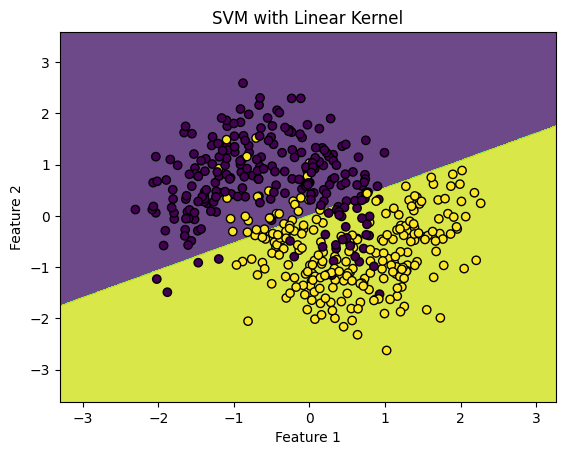

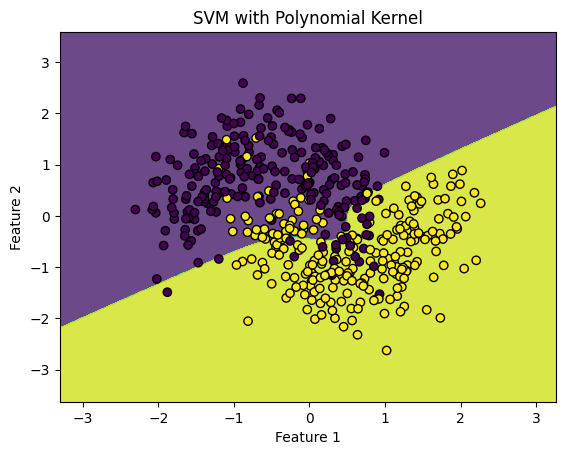

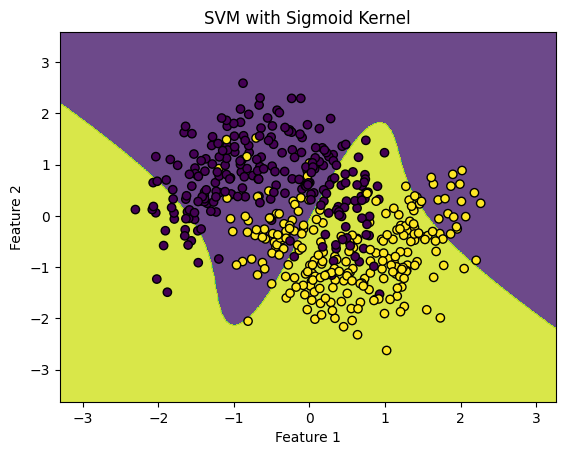

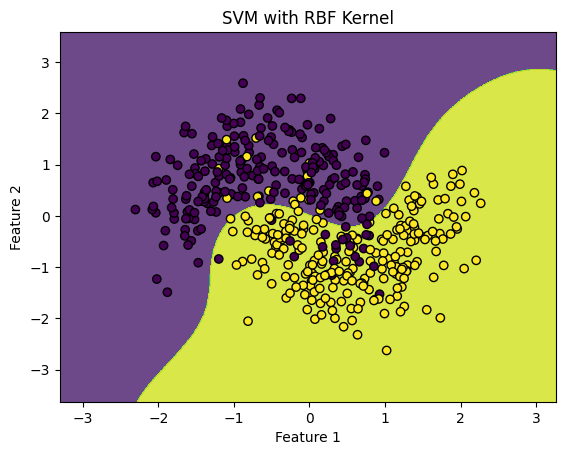

In [21]:
plot_decision_boundary(svm_linear, X_train_scaled, y_train,
                       'SVM with Linear Kernel')

plot_decision_boundary(svm_poly, X_train_scaled, y_train,
                       'SVM with Polynomial Kernel')

plot_decision_boundary(svm_sigmoid, X_train_scaled, y_train,
                       'SVM with Sigmoid Kernel')

plot_decision_boundary(svm_rbf, X_train_scaled, y_train,
                       'SVM with RBF Kernel')
